In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
noisy_matrix[1,1]=np.nan
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.39057534 0.30376782 0.52967167 ... 0.28272013 0.2885048  0.4775346 ]
 [0.38608761 0.30027751 0.52358572 ... 0.27947167 0.28518987 0.47204771]
 [0.01450813 0.01128362 0.01967494 ... 0.01050179 0.01071666 0.01773828]
 ...
 [0.36849367 0.28659392 0.49972602 ... 0.2667362  0.27219382 0.45053658]
 [0.15180981 0.11806925 0.20587413 ... 0.10988838 0.11213678 0.18560936]
 [0.04274672 0.03324603 0.05797019 ... 0.03094245 0.03157556 0.05226402]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.46589224  0.20849159  0.5455918  ...  0.2609487   0.3473833
   0.601975  ]
 [ 0.30221709         nan  0.6478189  ...  0.25569692  0.29095905
   0.48110233]
 [-0.06356239 -0.02806879 -0.04803238 ... -0.09951117 -0.01064119
   0.08107265]
 ...
 [ 0.43259442  0.36887898  0.64157176 ...  0.2078756   0.41807154
   0.30890479]
 [ 0.13150237  0.13897318  0.13551679 ...  0.12375244  0.18867197
   0.12272002]
 [ 0.01797157 -0.01958106  0.0702747  ... -0.01654816  0.13937966
   0.074

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix,
               prior_L = "norm",
               prior_F = "norm")
K=5
K=5

[IterativeSVD] Iter 1: observed MAE=0.076582
[IterativeSVD] Iter 2: observed MAE=0.074020
[IterativeSVD] Iter 3: observed MAE=0.068078
[IterativeSVD] Iter 4: observed MAE=0.056486
[IterativeSVD] Iter 5: observed MAE=0.051397
[IterativeSVD] Iter 6: observed MAE=0.051398
[IterativeSVD] Iter 7: observed MAE=0.051397
[IterativeSVD] Iter 8: observed MAE=0.051397
[IterativeSVD] Iter 9: observed MAE=0.051397
[IterativeSVD] Iter 10: observed MAE=0.051397


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.076582
[IterativeSVD] Iter 2: observed MAE=0.074020
[IterativeSVD] Iter 3: observed MAE=0.068078
[IterativeSVD] Iter 4: observed MAE=0.056486
[IterativeSVD] Iter 5: observed MAE=0.051397
[IterativeSVD] Iter 6: observed MAE=0.051398
[IterativeSVD] Iter 7: observed MAE=0.051397
[IterativeSVD] Iter 8: observed MAE=0.051397
[IterativeSVD] Iter 9: observed MAE=0.051397
[IterativeSVD] Iter 10: observed MAE=0.051397
[ 0.04170047 -0.15886374  0.2258762  -0.26032985  0.05534327 -0.5446214
 -0.00980013  0.29767197  0.12285864 -0.19357105  0.13111067 -0.06300829
 -0.09537038  0.12474021 -0.01216829  0.1809441  -0.00474369 -0.25780816
  0.04553856 -0.0375094   0.11400192 -0.08811048  0.17250248  0.28072552
  0.12319424 -0.36112945  0.153562   -0.01071071  0.00399385  0.10979412
  0.1298074  -0.24518482 -0.15243523  0.12735776  0.07170395  0.06911889
 -0.2217204   0.26164426  0.

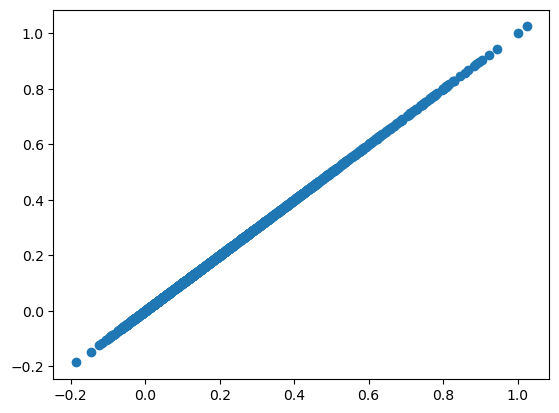

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

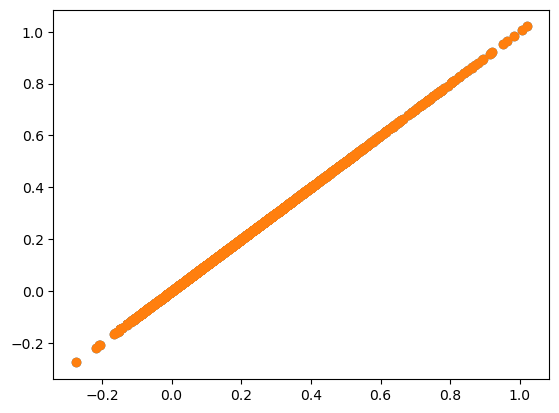

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00661768, 0.00661768, 0.00661768, ..., 0.00661768, 0.00661768,
        0.00661768],
       [0.00661768, 0.00661768, 0.00661768, ..., 0.00661768, 0.00661768,
        0.00661768],
       [0.00661768, 0.00661768, 0.00661768, ..., 0.00661768, 0.00661768,
        0.00661768],
       ...,
       [0.00661768, 0.00661768, 0.00661768, ..., 0.00661768, 0.00661768,
        0.00661768],
       [0.00661768, 0.00661768, 0.00661768, ..., 0.00661768, 0.00661768,
        0.00661768],
       [0.00661768, 0.00661768, 0.00661768, ..., 0.00661768, 0.00661768,
        0.00661768]])

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

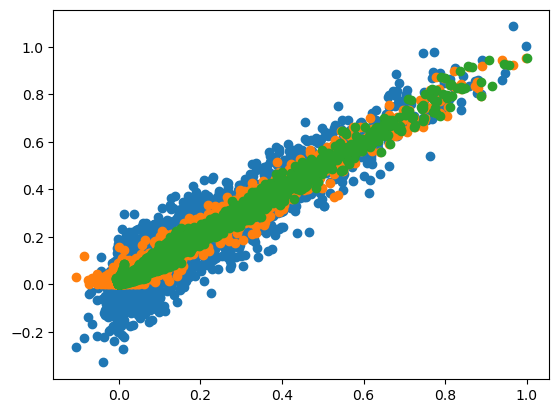

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

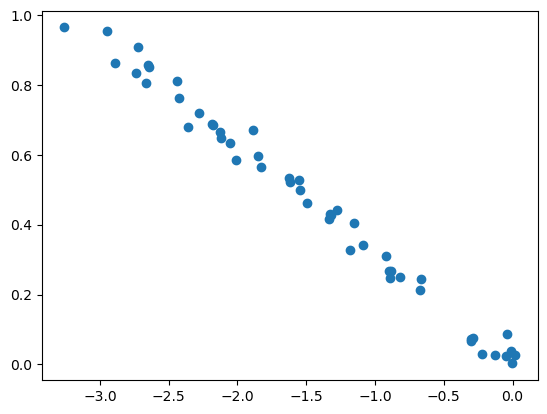

In [11]:
plt.scatter(mycebmf.L[:,0], u)

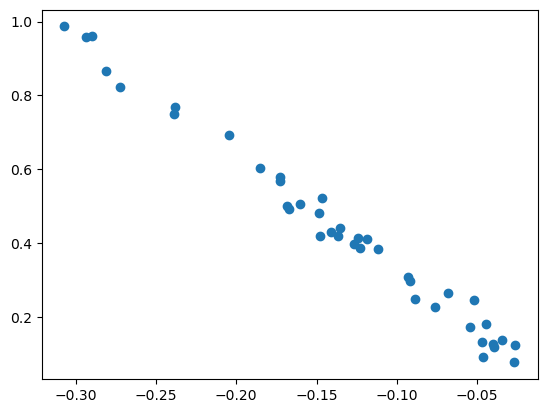

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([-157,  -33,  -31,  -30,  -32])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

21.424973353507553

In [17]:
mycebmf.tau

array([[119.66784951, 119.66784951, 119.66784951, ..., 119.66784951,
        119.66784951, 119.66784951],
       [119.66784951, 119.66784951, 119.66784951, ..., 119.66784951,
        119.66784951, 119.66784951],
       [119.66784951, 119.66784951, 119.66784951, ..., 119.66784951,
        119.66784951, 119.66784951],
       ...,
       [119.66784951, 119.66784951, 119.66784951, ..., 119.66784951,
        119.66784951, 119.66784951],
       [119.66784951, 119.66784951, 119.66784951, ..., 119.66784951,
        119.66784951, 119.66784951],
       [119.66784951, 119.66784951, 119.66784951, ..., 119.66784951,
        119.66784951, 119.66784951]])

In [18]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[-151   -6  -15  -14  -15]
[-130   -4  -12   -9   -7]


In [19]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1846.3049548460008
[-151   -6  -15  -14  -15]
[-130   -4  -12   -9   -7]
108.32171432660826
-2198.1155750583707
[inf, 1435.8694964796246, 1483.304954938272]


In [20]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 1435.8694964796246, 1483.304954938272, 1511.6460401353884]


In [21]:
for i in range(20):
    mycebmf.iter()



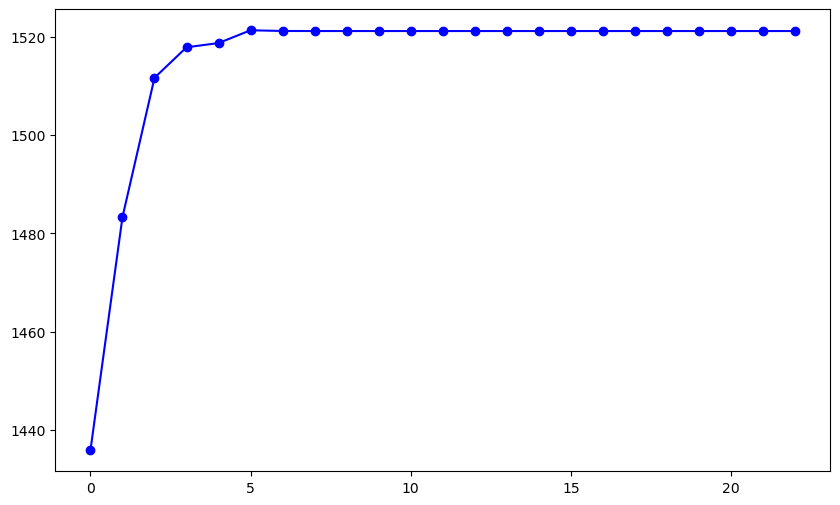

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

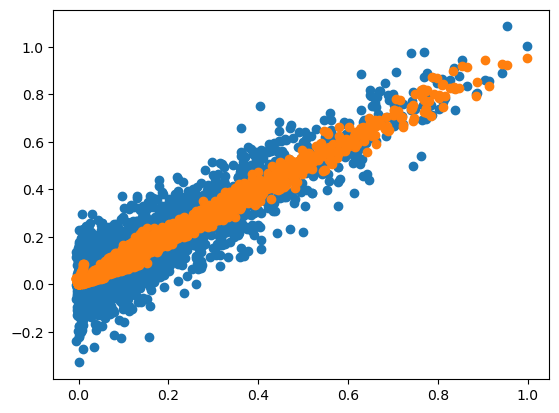

In [23]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
